### Which genes change their expression when growth is induced by a temperature shift in a Siz12 or SUMO12KD mutant without putatively  confounding effects of SA hyperaccumulation?

Mutant without SA:                    pad4  
No SA, no SUMO conjugation (siz1 KO): siz1\_pad4  
No SA, impaired SUMO (SUMO12 KD):     1xB\_pad4  

T0 = 22°C (just before switching to 28°C)   
T1 = 1 day at 28°C  
T2 = 4 days at 28°C  

## 1. Which genes are  differentially expressed when comparing timepoints?
We want to know how many genes are differentially expressed (q < 0.01) at different timepoints for each strain (background Pad4, mutant Siz12 en mutant 1xB).  
Moreover we want to know
1. For each timepoint-comparison, the overlap in DEGs between strains 
2. Per strain, the overlap in DEGs between timepoint-comparisons 
--> three different three-way Venns.

Data is in **reanalysisTime**/[mutant]\_Tx\_vs\_Ty.txt  
Columns:  
probeset_id, transcript_id, logFC, AveExpr, t, P.Value, adj.P.Val, B, qvalues  
    
We use probeIDs rather than transcriptIDs because probes can map to multiple transcripts and analyzing the data using transcripts can lead to 'multiplication' of datapoints. We prefer to avoid this.  






In [11]:
# specific imports for making Venn diagrams
from matplotlib_venn import venn3, venn3_unweighted
from matplotlib_venn import venn2, venn2_unweighted
from matplotlib import pyplot as plt

# make plots appear in the notebook
%matplotlib inline 


In [12]:
# Assume notebook is in [workingdir]/notebooks and data is in [workingdir]/data. 
# Results will be stored in [workingdir]/results

import os
if os.getcwd().split('/')[-1] == 'notebooks': 
    os.chdir('..') # move one directory up to [workingdir]
    
workingdir = os.getcwd()

print('Assuming data is stored in '+workingdir+'/data/, results will be stored in '+workingdir+'/results/')
os.system('mkdir -p results')
os.system('mkdir -p results/pickles')
os.system('mkdir -p util')
os.system('mkdir -p util/pickles')

Assuming data is stored in /Users/like/Dropbox/00.Projects/Like_Harrold/repository/data/, results will be stored in /Users/like/Dropbox/00.Projects/Like_Harrold/repository/results/


0

#### 1. For each timepoint-comparison, the overlap in DEGs between strains --> three different three-way Venns.


T0_vs_T1
pad4 160
siz1-2_pad4 278
1xB_pad4 74

T0_vs_T2
pad4 256
siz1-2_pad4 1503
1xB_pad4 2975

T1_vs_T2
pad4 78
siz1-2_pad4 2389
1xB_pad4 2492


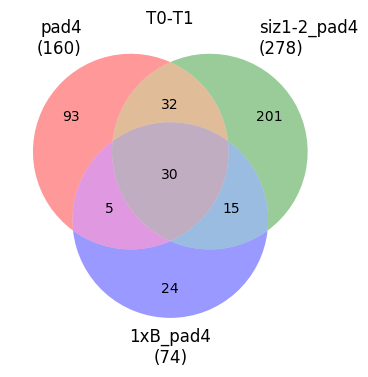

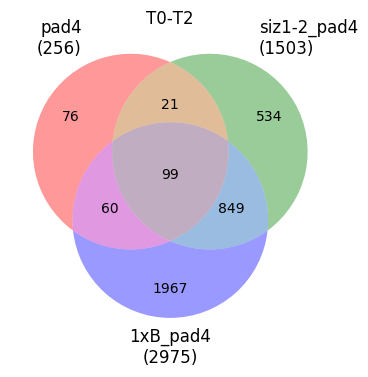

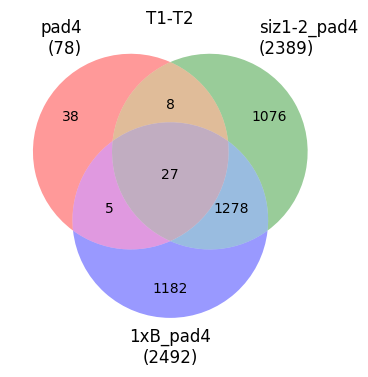

In [13]:
import utils # utils.py contains several functions that are used in mutliple notebooks

maxQ        = 0.01 # q-value threshold, if it is equal to or below this threshold, 
                   # we consider the gene differentially expressed in this comparison. 
strains     = ['pad4', 'siz1-2_pad4', '1xB_pad4']
timepoints  = ['T0','T1','T2']
dirnameTime = 'data/reanalysisTime/'

outdirname  = 'results/Venn_diagram/'
os.system('mkdir -p '+outdirname)


# first, for each timepoint, the overlap in DEGs per strains
for x, Tx in enumerate(timepoints[:-1]):
    for y, Ty in enumerate(timepoints[x+1:]):
        
        probesets = []
        labels    = []
        print '\n'+Tx+'_vs_'+Ty
        for S in strains:
            # select DEGs in strains when comparing timepoint Tx to Ty
            probes = utils.select_probes(dirnameTime+S+'_'+Tx+'_vs_'+Ty+'.txt', maxQ)
            print S, len(probes)
            probesets.append(probes)

            labels.append(S+'\n('+str(len(probes))+')')  
            
        plt.figure()
        plt.title(Tx+'-'+Ty)
        #venn = venn3(probesets, set_labels = labels)  ## circles drawn according to size
        venn = venn3_unweighted(probesets, set_labels = labels)  ## _unweighted: circles of the same size
        plt.savefig(outdirname+'/VENN_'+Tx+'-'+Ty+'_allStrains.eps')

  
  
|Timepoint-comparison|pad4|siz1\_pad4|1xB\_pad4|  
|--------------------|----|---------|--------|  
|T0 - T1|160|278|74|  
|T0 - T2|256|1503|2975|  
|T1 - T2|78|2389|2492|  


In the background (Pad4), most genes are diff. expressed when comparing T2 to T0 (256 genes).
Is it the case that most of these differences already have occured at day 1 (T1), when 160 genes are diff. expr. compared to 78 genes when comparing T2 to T1? In other words are the genes that are differentially expressed when comparing T1 to T0 still differentially expressed when comparing T2 to T0?

We can check this with a Venn diagram: are genes that are diff. expr. at T1 compared to T0, still diff. expressed when comparing T2 to T0?

#### 2. Per strain, the overlap in DEGs between timepoint-comparisons  --> three different three-way Venns.

pad4 160
pad4 256
pad4 78
siz1-2_pad4 278
siz1-2_pad4 1503
siz1-2_pad4 2389
1xB_pad4 74
1xB_pad4 2975
1xB_pad4 2492


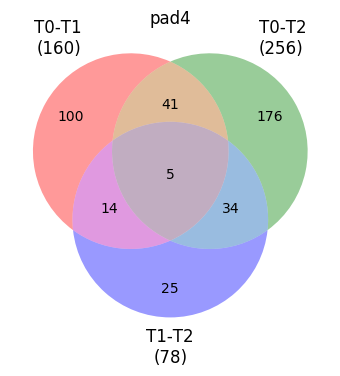

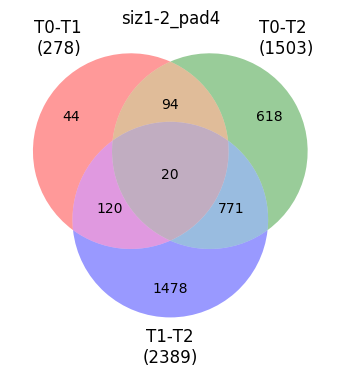

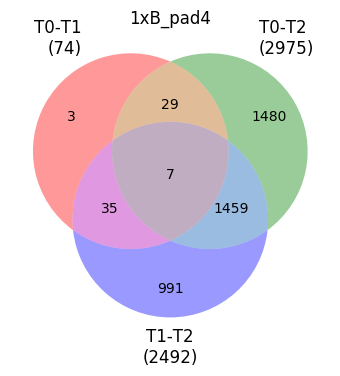

In [14]:

# Now, for each strain, the overlap in DEGs per timepoint comparison
for S in strains:
    probesets = []
    labels    = []
    for x, Tx in enumerate(timepoints[:-1]):
        for y, Ty in enumerate(timepoints[x+1:]):

            # select DEGs in strains when comparing timepoint Tx to Ty
            probes = utils.select_probes(dirnameTime+S+'_'+Tx+'_vs_'+Ty+'.txt', maxQ)
            print S, len(probes)
            probesets.append(probes)

            labels.append(Tx+'-'+Ty+'\n('+str(len(probes))+')')  

    plt.figure()
    plt.title(S)
    #venn = venn3(probesets, set_labels = labels)
    venn = venn3_unweighted(probesets, set_labels = labels)
    plt.savefig(outdirname+'/VENN_Timepoints_strain_'+S+'.eps')


 
|Strain|T0 - T1|T0 - T2|T1 - T2|  
|------|-------|-------|-------|  
|pad4|160|256|78|  
|siz1\_pad4|278|1503|2389|  
|1xB\_pad4|74|2975|2492|  


#### Conclusions
1. In the two mutants, much more genes are overexpressed when comparing different timepoints.
2. This is most pronounced when comparing T2 to T1 and T2 to T0: most changes occur between 1 day and 4 days after the temperature switch.
___
___


## 2.  Which genes are  differentially expressed when comparing strains (mutant to background)?

Are the same genes DE when compared to the background in the two mutant strains? --> does knockout of the SUMO conjugase leave more or less the same footprint as knockdown of preferred SUMOs?

Here we will plot which genes are DEG (MUT compared to BKGR) at the three different timepoints.
We want to know whether the same genes are differentially expressed when we compare the two mutants *siz1.2* and *1xB* to the background. Moreover, we also want to know whether genes that are differentially regulated in time in the background are among those genes that are DEG: whether switching on a gene (or off) does not work when SUMOylation is impaired.

We will test whether overlap is significant using the hypergeometric test implemented in scipy.

As mentioned above, we will determine overlap in terms of probes, not gene IDs, because one probe can map to multiple gene IDs and we want to 'weigh' each probe equally.

Where previously we looked at genes that are differentially expressed when comparing timepoints, we now look, per timepoint, at genes that are differentially expressed when comparing a double mutant strain (siz1\_pad4 or 1xB\_pad4) to the background.

This data is in **data/reanalysisStrains/**

38409 tested probes in this experiment



*********************************
	T0
*********************************

134 DEGs when comparing pad4 (bkgr) to siz1-2_pad4
20 DEGs when comparing pad4 (bkgr) to 1xB_pad4
11 DEGs in both comparisons
P-value: 2.41305944547e-25



*********************************
	T1
*********************************

5525 DEGs when comparing pad4 (bkgr) to siz1-2_pad4
2849 DEGs when comparing pad4 (bkgr) to 1xB_pad4
2623 DEGs in both comparisons
P-value: 0.0


160 DEGs (probes) in pad4
160 DEGs when comparing pad4 T1 to earlier timepoints
5525 DEGs when comparing pad4 (bkgr) to siz1-2_pad4
82 DEGs in both comparisons
P-value: 5.43698802108e-29

160 DEGs when comparing pad4 T1 to earlier timepoints
2849 DEGs when comparing pad4 (bkgr) to 1xB_pad4
55 DEGs in both comparisons
P-value: 9.36758044303e-24


160 DEGs when comparing pad4 T1 to earlier timepoints
2623 DEGs in both mutant-background comparisons as time T1
49 DEGs in all
P-value: 1.85627884866e-20


*****

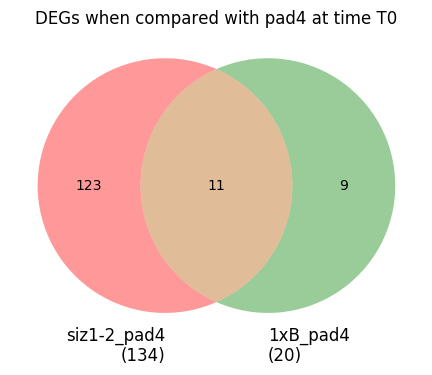

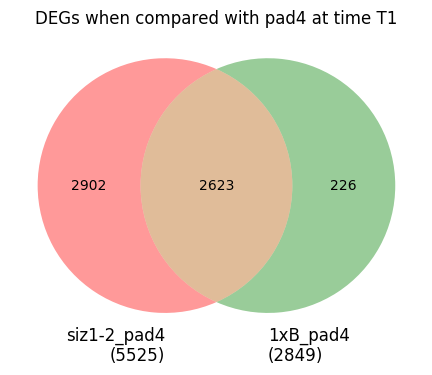

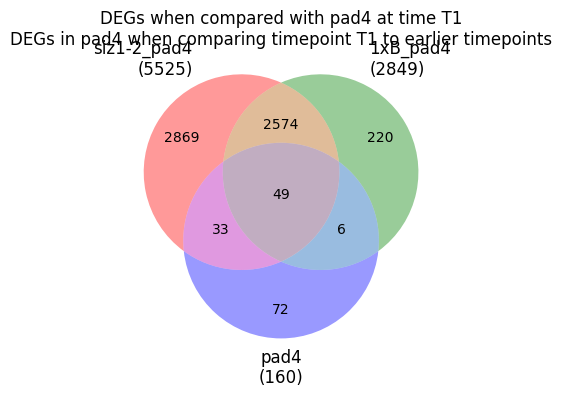

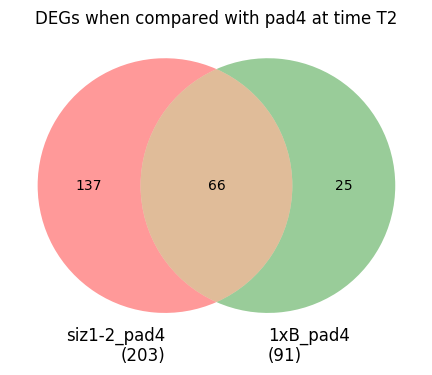

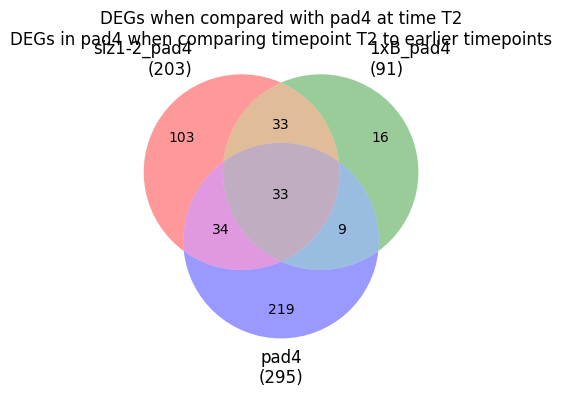

In [17]:
import numpy as np
import sys, glob, os, pickle
from scipy import stats


maxQ = 0.01
muts = ['siz1-2_pad4', '1xB_pad4']
bkgr = 'pad4'


# directory with comparison between STRAINS at different timepoints
dirnameStrains = 'data/reanalysisStrains/'

# for hypergeometric test we need to have the total 'population': the total number of probes in the experiment:
ALL_PROBES = set([])
for line in open('data/rmadata.txt').readlines():
    ALL_PROBES.add(line.split('\t')[0])
print len(ALL_PROBES), 'tested probes in this experiment\n\n'           



for T in timepoints:
    print '\n*********************************'
    print '\t', T
    print '*********************************\n'
    
    mut_probes = []
    labels     = []
    
    # select DEGs in mutant at timepoint t
    for mut in muts:
        probes = utils.select_probes(dirnameStrains+T+'_'+bkgr+'_vs_'+mut+'.txt', maxQ)
        mut_probes.append(probes)
        
        pickle.dump(probes, open('util/pickles/'+T+'_'+bkgr+'_vs_'+mut+'.DEGs_q'+str(maxQ)+'.probes_as_set', 'w'))
        labels.append(mut+'\n('+str(len(probes))+')')

    #First only compare the two mutants in a 2-way Venn
    plt.figure()
    plt.title('DEGs when compared with '+bkgr+' at time '+T)
    #venn = venn2(mut_probes, set_labels = labels)
    venn = venn2_unweighted(mut_probes, set_labels = labels)
    plt.savefig(outdirname+'/VENN2_'+muts[0]+'-'+muts[1]+'_'+T+'.eps')
    
    '''
    Test whether the overlap is significant:
    # The hypergeometric distribution models drawing objects from a bin. 
    # M is the total number of objects, n is total number of Type I objects. 
    # The random variate represents the number of Type I objects in N drawn 
    # without replacement from the total population.
    '''
    
    M = len(ALL_PROBES)
    n = len(mut_probes[0])
    N = len(mut_probes[1])
    x = len(mut_probes[0].intersection(mut_probes[1]))
    
    print n, 'DEGs when comparing pad4 (bkgr) to', muts[0]
    print N, 'DEGs when comparing pad4 (bkgr) to', muts[1]
    print x, 'DEGs in both comparisons'
    print 'P-value:', stats.hypergeom.sf(x, M, n, N)
    print '\n'
        
    # For the two later timepoints, we also compare the overlap with those genes that 
    # are differentially regulated in time in the background strain
    if T != 'T0':
        bkgr_probes = utils.select_probes(dirnameTime+bkgr+'_T0_vs_'+T+'.txt', maxQ)
        
        if T == 'T2':
            print (len(bkgr_probes)), 'DEGs (probes) in', bkgr, 'T2 vs T0'
            bkgr_probes = bkgr_probes.union(utils.select_probes(dirnameTime+bkgr+'_T1_vs_'+T+'.txt', maxQ))
            print (len(bkgr_probes)), 'DEGs (probes) in', bkgr, 'T2 vs T0 and T2 vs T1'
        print(str(len(bkgr_probes))+' DEGs (probes) in '+bkgr)
        
        plt.figure()
        plt.title('DEGs when compared with '+bkgr+' at time '+T\
                  +'\nDEGs in '+bkgr+' when comparing timepoint '+T+' to earlier timepoints')
        #venn = venn3(mut_probes+[bkgr_probes], set_labels = labels+[bkgr+'\n('+str(len(bkgr_probes))+')'])
        venn = venn3_unweighted(mut_probes+[bkgr_probes], set_labels = labels+[bkgr+'\n('+str(len(bkgr_probes))+')'])
        plt.savefig(outdirname+'/VENN3_'+muts[0]+'-'+muts[1]+'_'+T+'.eps')
        
        #test whether the overlap is significant:
        # The hypergeometric distribution models drawing objects from a bin. 
        # M is the total number of objects, n is total number of Type I objects. 
        # The random variate represents the number of Type I objects in N drawn without replacement from the total population.
        M = len(ALL_PROBES)
        for i, mut in enumerate(muts):
            n = len(bkgr_probes)
            N = len(mut_probes[i])
            x = len(mut_probes[i].intersection(bkgr_probes))

            print n, 'DEGs when comparing pad4 '+T+' to earlier timepoints'
            print N, 'DEGs when comparing pad4 (bkgr) to', muts[i]
            print x, 'DEGs in both comparisons'
            print 'P-value:',stats.hypergeom.sf(x, M, n, N)
            print
            
        mut_probes_both = mut_probes[0].intersection(mut_probes[1])
        n = len(bkgr_probes)
        N = len(mut_probes_both)
        x = len(mut_probes_both.intersection(bkgr_probes))
        print
        print n, 'DEGs when comparing pad4 '+T+' to earlier timepoints'
        print N, 'DEGs in both mutant-background comparisons as time', T
        print x, 'DEGs in all'
        print 'P-value:', stats.hypergeom.sf(x, M, n, N)
        print
    
    



38409 tested probes in this experiment

P-value overlap siz1-2\_pad4 and the 1xB\-pad4 mutants:  

|Timepoint|P-value|  
|---------|-------|  
|T0|2.4e-25|  
|T1|0|  
|T2|7.2e-137|  




#### Conclusions

The two mutants are very similar in terms of DEGs at different timepoints, which is to be expected as in both mutants SUMOylation is disrupted.
The siz1.2 mutant consistently has more DEGs than 1xB (why? --> Harrold: it is a more disruptive mutation. 1xB is a knockdown rather than a knockout).

Importantly, the overlap with DEGs in time in the background is also significant, indicating that the disruption involves not correctly adjusting the expression level of genes that are DEG in a temperature shift.


___

The two-way Venns plotted above, are -in different colors- Figure 5b in the paper
___




## Remaining questions:
1. How do the genes that are DE over time in the background, behave in the mutants? --> `1.heatmap_bkgrDEGs_inMutant`  
2. What is the difference in expressionlevel at different timepoints for those genes that are a DEG when comparing the mutant to the background? Are genes that should be upregulated not upregulated? Or is it a mixed bag? --> `2.scatterplot_DEGs_mutant_vs_bkgr.ipynb`  
3. Are those genes involved in growth? --> `3.Overlap_with_growthTF_targets.ipynb` (Venn diagram with overlap with putative targets of PIF4, BZR1, ARF6). 
    